In [2]:
import cv2
import os
import imghdr
import matplotlib.pyplot as plt
import tensorflow as tf

C:\Users\Al-ghazali\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data_dir = 'data'

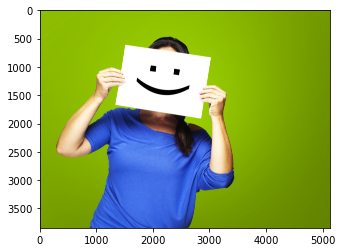

In [4]:
image_extns = ['jpeg','jpg', 'bmp', 'png']
img = cv2.imread(os.path.join('data', 'happy', 'smile.woman_.jpg'))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [5]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir, image_class,image)
        
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            
            if tip not in image_extns:
                print("Image in ext list does not exist {}".format(image_path))
                os.remove(image_path)
                
        except Exception as e:
            print("Issue with image {}".format(image_path))

In [6]:
tf.data.Dataset??

In [11]:
import numpy as np

In [12]:
#Primarily used to build data pipeline and does a ton of formatting
data = tf.keras.utils.image_dataset_from_directory('data') 

Found 195 files belonging to 2 classes.


In [13]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [10]:
#creating a generator
data_iterator = data.as_numpy_iterator()

In [13]:
batch = data_iterator.next()
#images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [55]:
#Represents the label, class 1 = sad people class0 = happy people
batch[1]

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1])

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [14]:
#preprocess the data by converting all values between 0 and 1

data = data.map(lambda x,y : (x/255, y))
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()
batch[0].max()

1.0

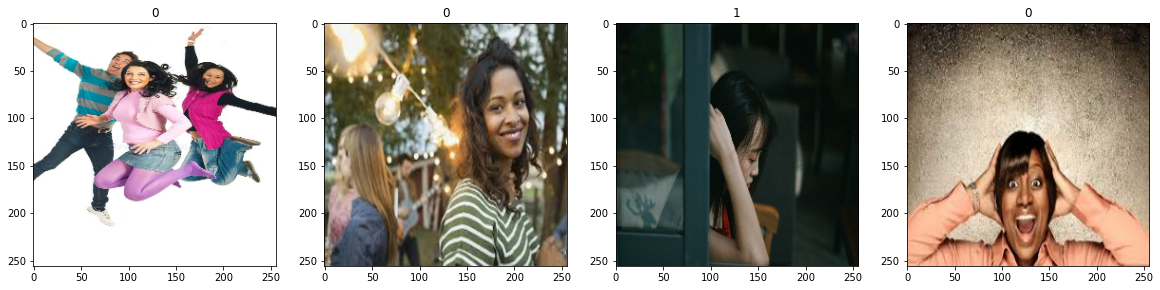

In [15]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [51]:
len(data)

7

In [16]:
train_size = int(len(data)*.7) #taking 70% of our data for training
val_size = int(len(data)* .2)+1
test_size = int(len(data)* .1)+1

In [23]:
train_size

4

In [25]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [27]:
model = Sequential()

In [28]:
model.add(Conv2D(16,(3,3),1,activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [29]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 32)       

In [31]:
logdir = 'logs_dir'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [32]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 9s 2s/step - loss: 2.9644 - accuracy: 0.4922 - val_loss: 1.6079 - val_accuracy: 0.3281
Epoch 2/20
4/4 [==============================] - 8s 2s/step - loss: 1.0060 - accuracy: 0.4766 - val_loss: 0.5641 - val_accuracy: 0.6875
Epoch 3/20
4/4 [==============================] - 8s 2s/step - loss: 0.5935 - accuracy: 0.6641 - val_loss: 0.5353 - val_accuracy: 0.6719
Epoch 4/20
4/4 [==============================] - 8s 2s/step - loss: 0.5281 - accuracy: 0.6797 - val_loss: 0.5184 - val_accuracy: 0.6719
Epoch 5/20
4/4 [==============================] - 8s 2s/step - loss: 0.5343 - accuracy: 0.7344 - val_loss: 0.4765 - val_accuracy: 0.7031
Epoch 6/20
4/4 [==============================] - 9s 2s/step - loss: 0.4364 - accuracy: 0.7812 - val_loss: 0.4016 - val_accuracy: 0.8125
Epoch 7/20
4/4 [==============================] - 9s 2s/step - loss: 0.4182 - accuracy: 0.8828 - val_loss: 0.3419 - val_accuracy: 0.8438
Epoch 8/20
4/4 [=========================

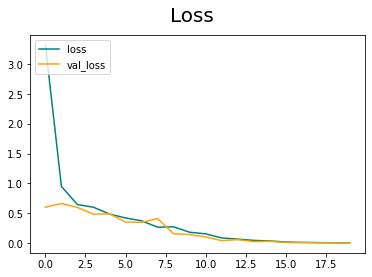

In [25]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [26]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [27]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [28]:
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 0s 156ms/step


In [29]:
print(f' precision report is {pre.result().numpy()} and recall result is {re.result().numpy()} and accuracy result is {acc.result().numpy()}')

 precision report is 0.0 and recall result is 0.0 and accuracy result is 1.0


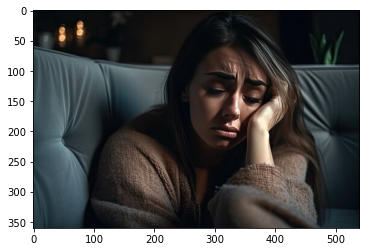

In [73]:
img = cv2.imread('sad.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

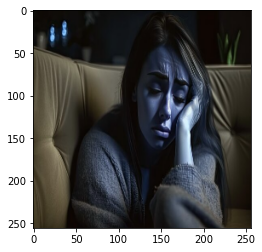

In [74]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [75]:
yhat = model.predict(np.expand_dims(resize/255,0))
                    

1/1 [==============================] - 0s 49ms/step


In [76]:
yhat

array([[0.98518604]], dtype=float32)

In [77]:
if yhat > 0.5:
    print("Predicted class is sad")
else:
    print("Predicted class is Happy")

Predicted class is sad


In [70]:
from tensorflow.keras.models import load_model

In [78]:
model.save(os.path.join('model','sentimentclassifier.h5'))

C:\Users\Al-ghazali\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
